In [77]:
%matplotlib inline

import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LogisticRegression

names = ['label'] + [str(x) for x in range(0, 34)]
train = pd.read_csv('train/in.tsv', sep='\t', names=names)
dev = pd.read_csv('dev-0/in.tsv', sep='\t', names=names)
test = pd.read_csv('test-A/in.tsv', sep='\t', names=names)
exp = pd.read_csv('dev-0/expected.tsv', sep='\t', names=['label'])
dev['label'] = exp['label']

In [78]:
myvarcol = "24"

lr = LogisticRegression()
lr.fit(train[myvarcol].values.reshape(-1, 1), train['label'].values.ravel())

pd.DataFrame(lr.predict(dev[myvarcol].values.reshape(-1, 1))).to_csv('dev-0/out.tsv', sep='\t', header=False, index=False)
pd.DataFrame(lr.predict(test[myvarcol].values.reshape(-1, 1))).to_csv('test-A/out.tsv', sep='\t', header=False, index=False)
!python test_my_score.py

twój wynik acc to:  0.8
żeby zaliczyc zadanie powinieneś mieć conajmniej:  0.6
zaliczone


In [62]:
#Jaki jest rozkład próby treningowej (ile procent z próbek to te, w której osoba się znajduje).
100 * train['label'].value_counts()[0] / len(train)

69.322709163346616

In [64]:
#Jaką dokładność będzie miał algorytm zero rule na zbiorze deweloperskim?
100 - 100 * dev['label'].value_counts()[1] / len(dev)

52.0

In [66]:
#Oblicz dokładność, czułość, swoistość (accuracy, specifity, sensivity) na danych treningowych
#oraz deweloperskich modelu.

from sklearn.metrics import confusion_matrix
conf = confusion_matrix(train['label'], pd.DataFrame(lr.predict(train[myvarcol].values.reshape(-1, 1))))
tp, fn, fp, tn = conf.ravel()

#accuracy
print((tp + tn)/(tp + fp + fn + tn))

#specifity
print(tn/(tn + fp))

#sensivity
print(tp/(tp + fn))

conf2 = confusion_matrix(dev['label'], pd.DataFrame(lr.predict(dev[myvarcol].values.reshape(-1, 1))))
tp, fn, fp, tn = conf2.ravel()

#accuracy
print((tp + tn)/(tp + fp + fn + tn))

#specifity
print(tn/(tn + fp))

#sensivity
print(tp/(tp + fn))

0.713147410359
0.98275862069
0.103896103896
0.64
0.884615384615
0.375


In [67]:
#Stwórz macierz błędu dla danych treningowych i deweloperskich.
conf
conf2

array([[ 9, 15],
       [ 3, 23]], dtype=int64)

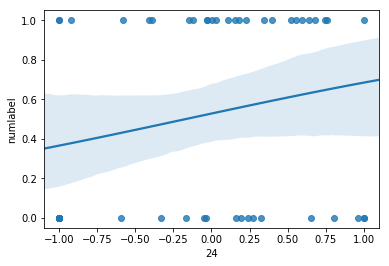

In [82]:
#Narysuj wykres regresji logistycznej jednej zmiennej dla dowolnej cechy dla danych deweloperskich.
dev["numlabel"] = [1 if x == "g" else 0 for x in dev["label"]]
sns.regplot(x="24", y="numlabel", data=dev, logistic=True)
